In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
news_df = pd.read_csv("news_preprocessed.csv")
news_df = news_df.dropna(subset=['preprocessed_text'])


In [3]:
news_df.head()

,title,text,subject,date,Label,preprocessed_text
0,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,Fake,making room hillary president obama today anno...
1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,2015-03-31,Fake,irony lost us hillary compared president wante...
2,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,Fake,anyone really think hillary clinton come clean...
3,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,Fake,nothing like political cronyism make stomach c...
4,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,Fake,case missed harry reid announced last week ret...


In [ ]:
# Separate the dataset into two subsets based on the 'Label'
df_fake = news_df[news_df['Label'] == 'Fake']
df_real = news_df[news_df['Label'] == 'Real']

In [ ]:
# Tokenize and count the frequency of words in fake news
words_fake = ' '.join(df_fake['preprocessed_text']).split()
counter_fake = Counter(words_fake)

# Tokenize and count the frequency of words in real news
words_real = ' '.join(df_real['preprocessed_text']).split()
counter_real = Counter(words_real)

# Get the 20 most common words in fake and real news
most_common_words_fake = counter_fake.most_common(20)
most_common_words_real = counter_real.most_common(20)

most_common_words_fake, most_common_words_real

([('trump', 74241),
  ('said', 31149),
  ('people', 26015),
  ('president', 25772),
  ('would', 23461),
  ('one', 22995),
  ('clinton', 18085),
  ('obama', 17920),
  ('like', 17660),
  ('donald', 17235),
  ('also', 15243),
  ('new', 14198),
  ('news', 14197),
  ('us', 13922),
  ('even', 13690),
  ('hillary', 13673),
  ('white', 12797),
  ('time', 12792),
  ('state', 12543),
  ('via', 11355)],
 [('said', 99037),
  ('trump', 54249),
  ('would', 31526),
  ('reuters', 28412),
  ('president', 26397),
  ('state', 19728),
  ('government', 18288),
  ('new', 16784),
  ('house', 16519),
  ('states', 16515),
  ('also', 15946),
  ('united', 15576),
  ('republican', 15346),
  ('people', 15138),
  ('told', 14244),
  ('could', 13709),
  ('one', 12676),
  ('last', 12613),
  ('party', 12436),
  ('washington', 12419)])

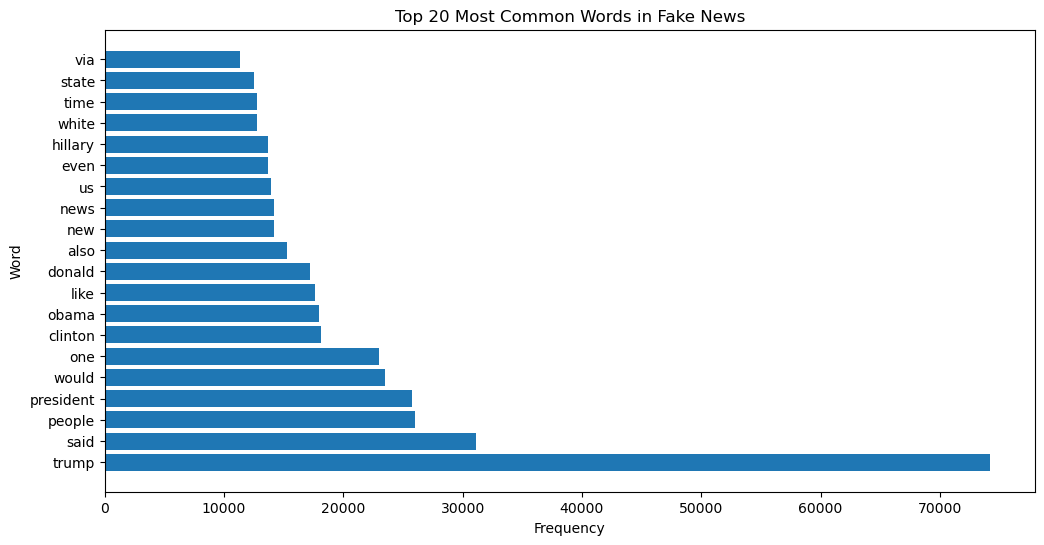

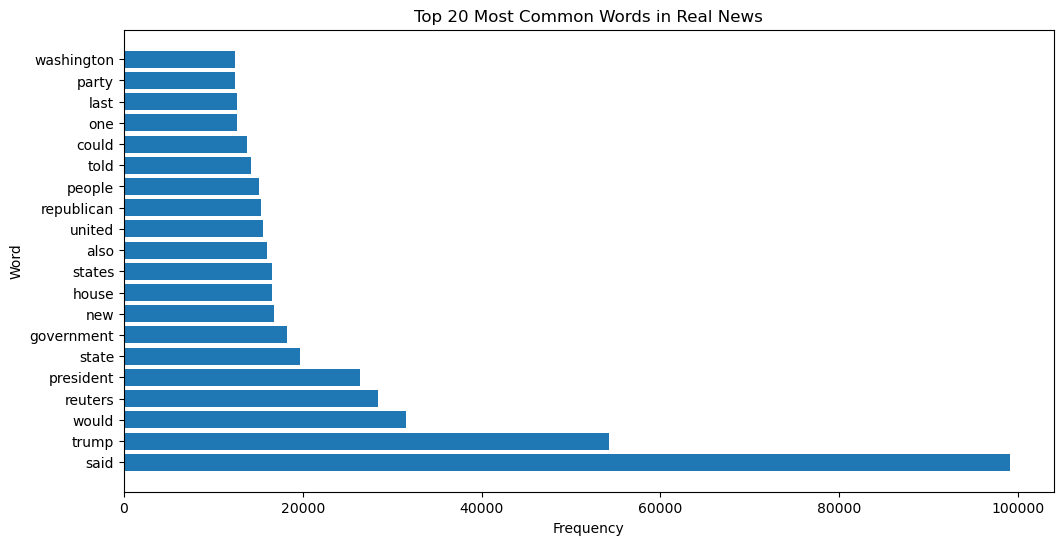

In [ ]:
# Plotting the most common words for Fake news
plt.figure(figsize=(12, 6))
plt.barh([word[0] for word in most_common_words_fake], [word[1] for word in most_common_words_fake])
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Common Words in Fake News')
plt.show()

# Plotting the most common words for Real news
plt.figure(figsize=(12, 6))
plt.barh([word[0] for word in most_common_words_real], [word[1] for word in most_common_words_real])
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Common Words in Real News')
plt.show()

Let's generate word clouds

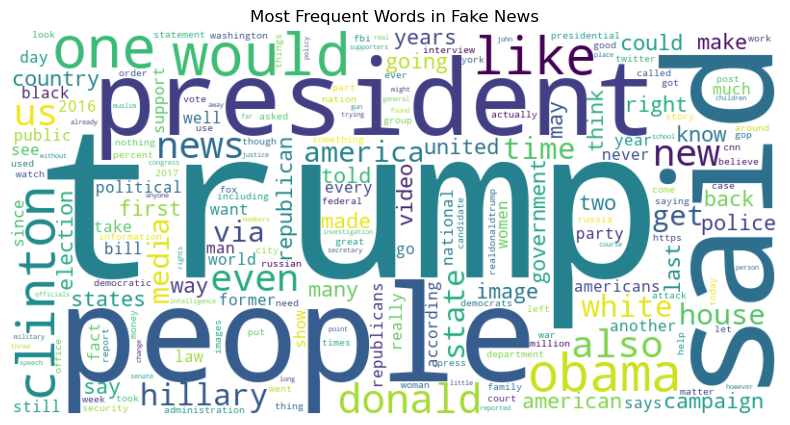

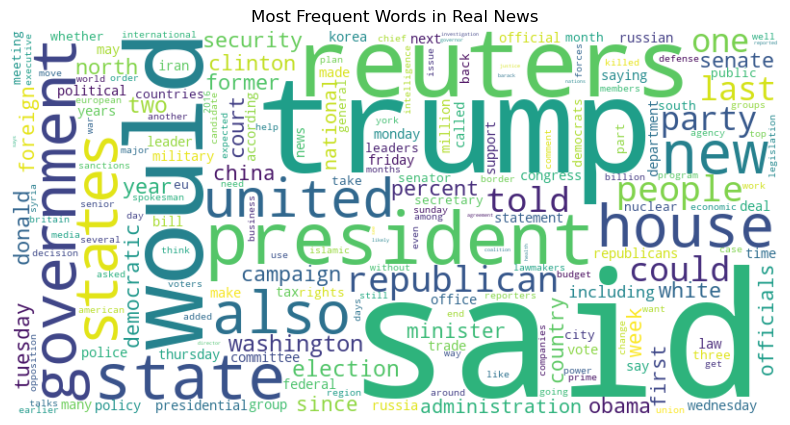

In [ ]:
from wordcloud import WordCloud

# Generate word clouds
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for Fake and Real news
generate_wordcloud(counter_fake, 'Most Frequent Words in Fake News')
generate_wordcloud(counter_real, 'Most Frequent Words in Real News')


### Fully interactive web-based dashboard
https://kriptostechnicalassessment.streamlit.app/

Just use the "preprocessed_text" and "Label" columns

In [8]:
# Prepare the features and labels
X = news_df['preprocessed_text']
y = news_df['Label']

### Feature Extraction
Convert the text data into TF-IDF vectors

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [10]:
from scipy.sparse import csr_matrix

# Function to compute summary statistics for a sparse matrix
def sparse_matrix_summary(sparse_matrix: csr_matrix):
    # Calculate the non-zero elements in each column
    non_zero_elements_per_column = sparse_matrix.getnnz(axis=0)
    
    # Calculate the sum of elements in each column
    sum_per_column = np.squeeze(np.asarray(sparse_matrix.sum(axis=0)))
    
    # Calculate the average and maximum TF-IDF values for each feature (column)
    avg_per_column = sum_per_column / non_zero_elements_per_column
    max_per_column = sparse_matrix.max(axis=0).toarray().flatten()
    
    # Replace NaNs with zeros (columns with zero non-zero elements)
    avg_per_column = np.nan_to_num(avg_per_column, nan=0.0)
    
    summary_stats = {
        'Non-zero elements per column': non_zero_elements_per_column,
        'Sum per column': sum_per_column,
        'Average per column': avg_per_column,
        'Max per column': max_per_column
    }
    
    return summary_stats

In [ ]:
# Compute summary statistics for the TF-IDF matrix
summary_stats = sparse_matrix_summary(X_tfidf)

# Show some sample statistics for the first few features
{key: val[:5] for key, val in summary_stats.items()}

{'Non-zero elements per column': array([1, 6, 9, 1, 1]),
 'Sum per column': array([0.08090921, 0.6489673 , 0.47664556, 0.12934066, 0.2091104 ]),
 'Average per column': array([0.08090921, 0.10816122, 0.05296062, 0.12934066, 0.2091104 ]),
 'Max per column': array([0.08090921, 0.140088  , 0.09348852, 0.12934066, 0.2091104 ])}

Split the dataset

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Show the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35404, 107711), (8852, 107711), (35404,), (8852,))

Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import rcParams

In [ ]:
# Evaluate the model using cross-validation
cv_accuracy = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
cv_precision = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='precision_macro')
cv_f1 = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='f1_macro')

mean_cv_accuracy = np.mean(cv_accuracy)
mean_cv_precision = np.mean(cv_precision)
mean_cv_f1 = np.mean(cv_f1)

std_cv_accuracy = np.std(cv_accuracy)
std_cv_precision = np.std(cv_precision)
std_cv_f1 = np.std(cv_f1)

In [ ]:
mean_cv_accuracy, mean_cv_precision, mean_cv_f1, std_cv_accuracy, std_cv_precision, std_cv_f1

(0.9880239632277672,
 0.9880224045338512,
 0.9880130889228882,
 0.0006996890166996978,
 0.0006963531644251139,
 0.0007005337897742759)

The mean accuracy across all folds is approximately 98%, with a standard deviation of 0.69%. These results suggest that the model is both accurate and consistent across different subsets of the data.

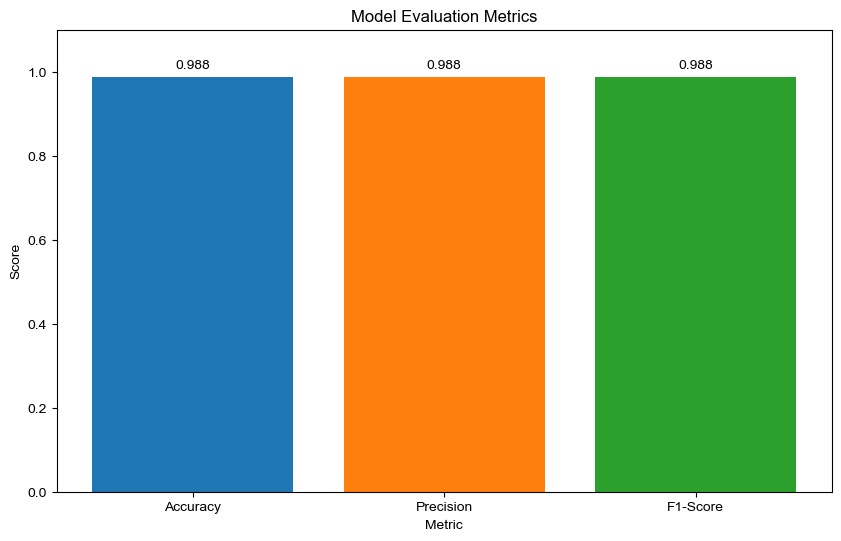

,Metric,Score
0,Accuracy,0.988024
1,Precision,0.988022
2,F1-Score,0.988013


In [ ]:
import plotly.express as px
# Prepare data for plotting
metrics_data = {'Metric': ['Accuracy', 'Precision', 'F1-Score'],
                'Score': [mean_cv_accuracy, mean_cv_precision, mean_cv_f1]}

df_metrics = pd.DataFrame(metrics_data)

# Create the bar plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df_metrics['Metric'], df_metrics['Score'], color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1.1)

# Add text annotations
for i, score in enumerate(df_metrics['Score']):
    plt.text(i, score + 0.02, f"{score:.3f}", ha='center')

plt.show()
df_metrics

In [ ]:
# Make predictions on the testing set
y_pred = rf_clf.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)

classification_rep

'              precision    recall  f1-score   support\n\n        Fake       0.99      0.99      0.99      4608\n        Real       0.99      0.99      0.99      4244\n\n    accuracy                           0.99      8852\n   macro avg       0.99      0.99      0.99      8852\nweighted avg       0.99      0.99      0.99      8852\n'

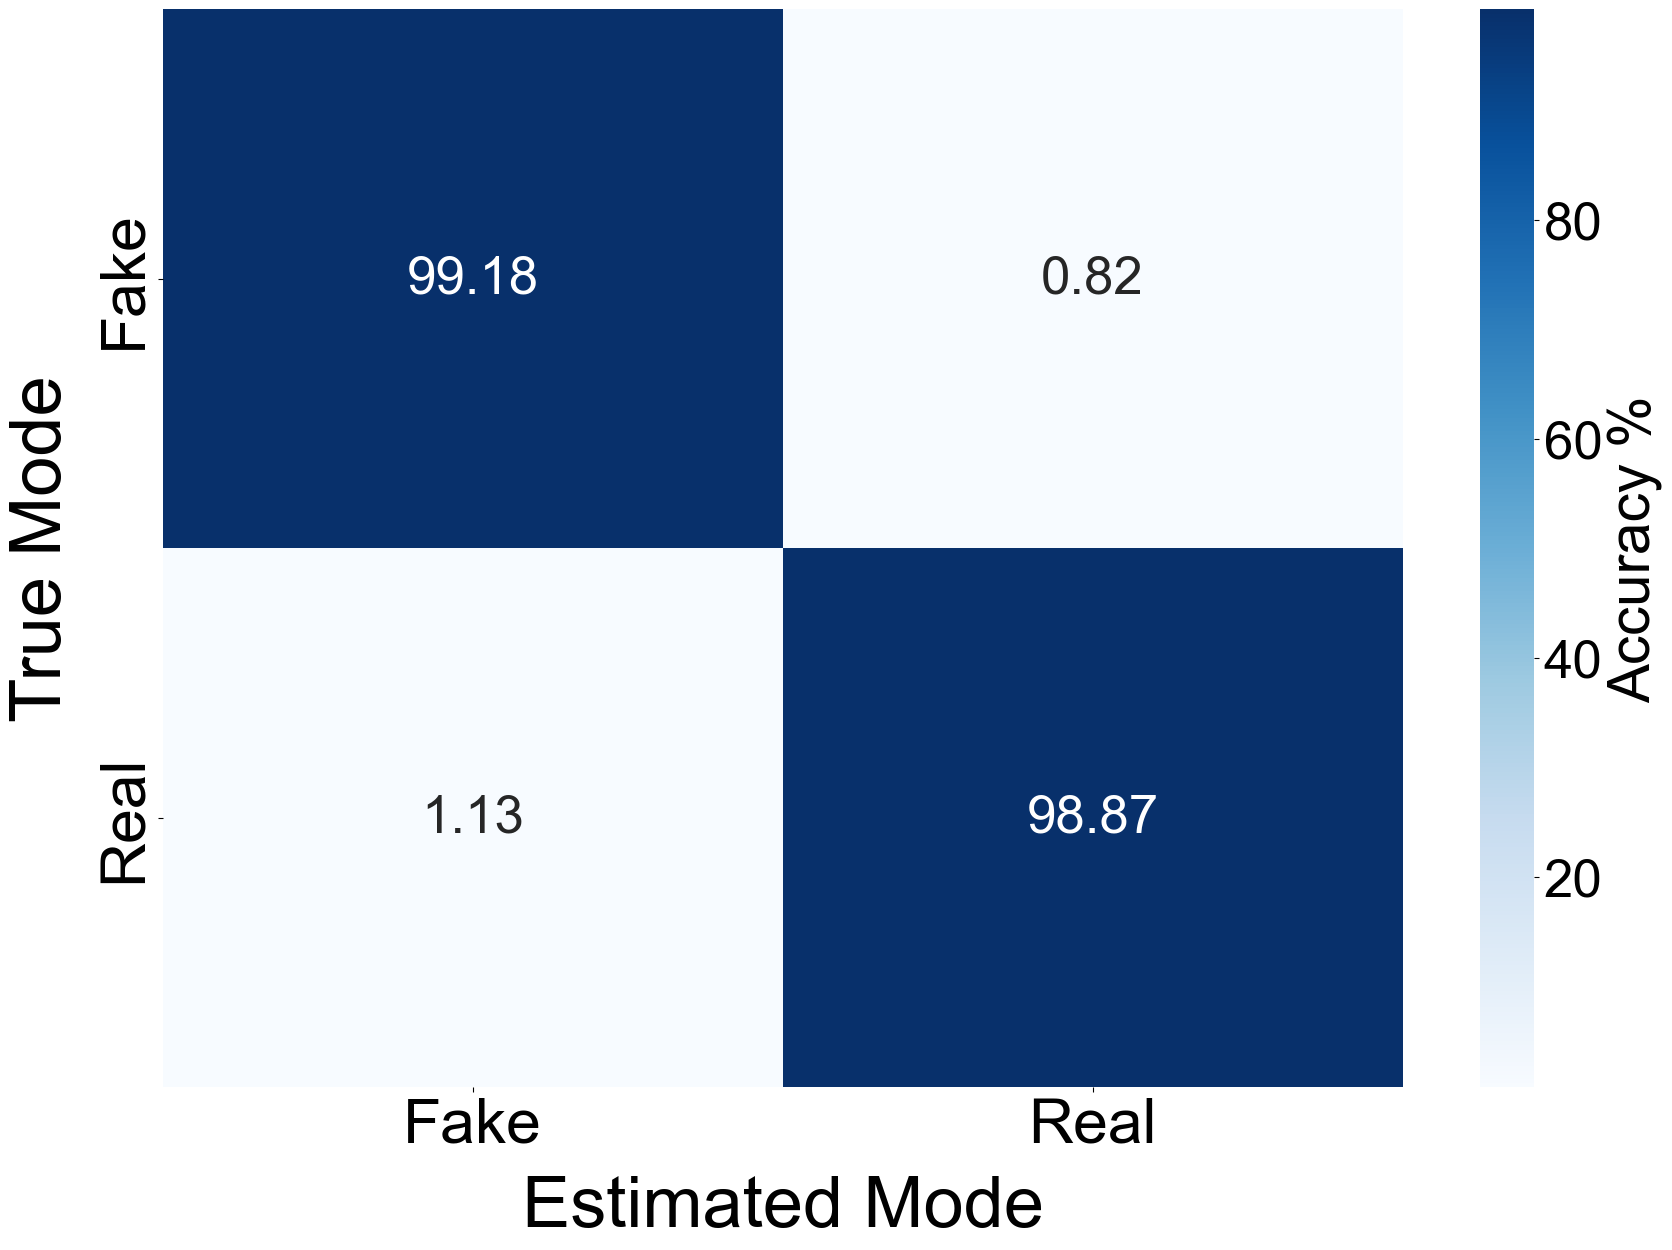

In [ ]:
import seaborn as sns

#Set global font family to Arial
rcParams['font.family'] = 'Arial'

# Calculate the percentage of accuracy for each class and update the diagonal
row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_matrix = cm / row_sums * 100
np.fill_diagonal(norm_conf_matrix, cm.diagonal() / row_sums[:, 0] * 100)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(20, 14))
ax = sns.heatmap(norm_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'], annot_kws={'fontsize': 38}, cbar_kws={'label': 'Accuracy %'})
ax.figure.axes[-1].yaxis.label.set_size(42)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=38)
plt.xlabel('Estimated Mode', fontdict={'fontsize': 52}, labelpad=15)
plt.ylabel('True Mode', fontdict={'fontsize': 52}, labelpad=15)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
plt.show()

The AUC score is a single value summary of the model's performance across different thresholds and is generally considered a good measure of a model's ability to distinguish between classes.

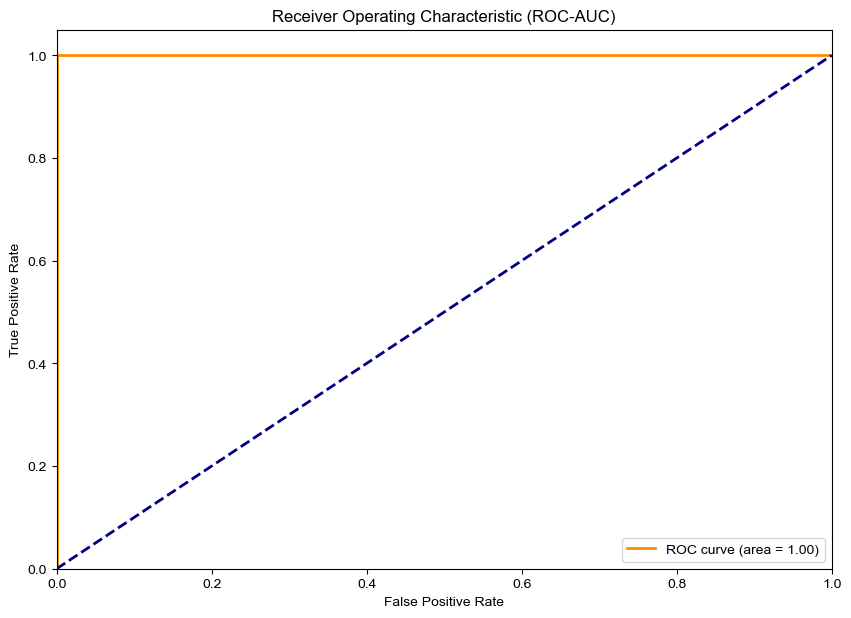

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=['Fake', 'Real'])
y_pred_bin = label_binarize(y_test, classes=['Fake', 'Real'])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
roc_auc = roc_auc_score(y_test_bin, y_pred_bin)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC-AUC)')
plt.legend(loc="lower right")
plt.show()


In this case, the curve is very close to the top-left corner of the plot, indicating excellent performance. The AUC score would also be very close to 1, signifying a high-quality classifier.

### Model Interpretation

SHAP (SHapley Additive exPlanations)

In [12]:
import pandas as pd

# Assume df is your DataFrame
df_sample = news_df.sample(frac=0.2)

In [13]:
X_sample = df_sample['preprocessed_text']
y_sample = df_sample['Label']

In [14]:
tfidf_vectorizer_sample = TfidfVectorizer()
X_tfidf_sample = tfidf_vectorizer_sample.fit_transform(X_sample)

In [15]:
# Split the dataset into training and testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_tfidf_sample, y_sample, test_size=0.2, random_state=42)

# Show the shapes of the training and testing sets
X_train_sample.shape, X_test_sample.shape, y_train_sample.shape, y_test_sample.shape

((7080, 56098), (1771, 56098), (7080,), (1771,))

In [18]:
rf_clf_sample = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_sample.fit(X_train_sample, y_train_sample)

RandomForestClassifier(random_state=42)

In [21]:
y_pred_sample = rf_clf_sample.predict(X_test_sample)
# Evaluate the model
classification_rep = classification_report(y_test_sample, y_pred_sample)

classification_rep

'              precision    recall  f1-score   support\n\n        Fake       0.98      0.98      0.98       911\n        Real       0.97      0.98      0.98       860\n\n    accuracy                           0.98      1771\n   macro avg       0.98      0.98      0.98      1771\nweighted avg       0.98      0.98      0.98      1771\n'

In [ ]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_clf_sample)
shap.initjs()

In [ ]:
x_test_sample =  X_test_sample.toarray()

In [ ]:
shap_values = explainer.shap_values(x_test_sample, check_additivity=False)

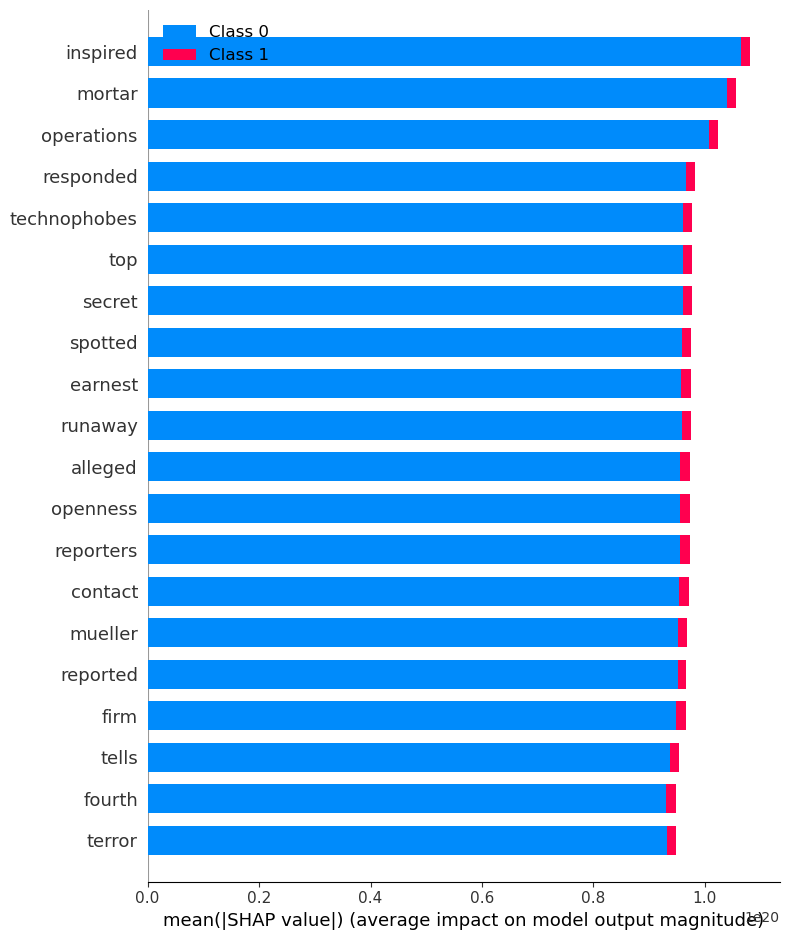

In [ ]:
# Summary plot
shap.summary_plot(shap_values, x_test_sample, feature_names=tfidf_vectorizer_sample.get_feature_names_out(), plot_type='bar')

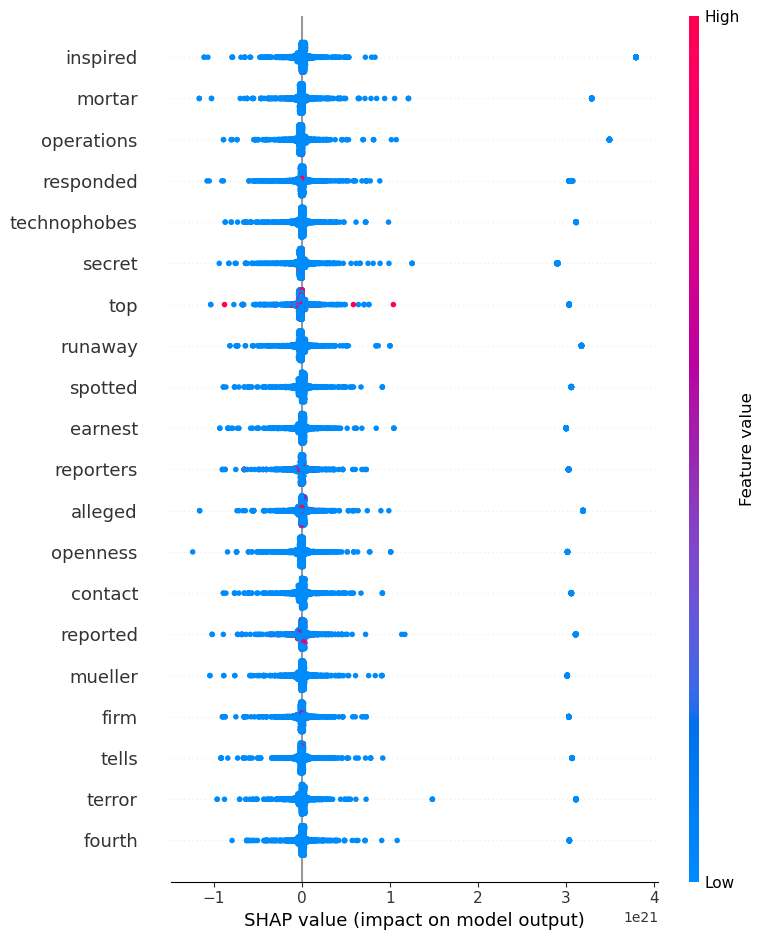

In [ ]:
shap.summary_plot(shap_values[0], x_test_sample, feature_names=tfidf_vectorizer_sample.get_feature_names_out())

### Feature Sensitivity Analysis

Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
x_test_sample = X_test_sample.toarray()
result = permutation_importance(rf_clf_sample, x_test_sample, y_test_sample, n_repeats=2, random_state=42)

In [ ]:
# Organize results into a DataFrame for easier interpretation
perm_importance_df = pd.DataFrame({
    'Feature': [f'Feature {i}' for i in range(X_test.shape[1])],
    'Importance_mean': result.importances_mean,
    'Importance_std': result.importances_std
})

# Sort features by importance
perm_importance_df.sort_values(by='Importance_mean', ascending=False, inplace=True)
perm_importance_df

Partial Dependence Plots (PDPs)

In [ ]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

# Features for which we will plot PDPs
features = [6, 8]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
plot_partial_dependence(rf_clf_sample, X_train_sample, features, ax=ax, grid_resolution=50)
plt.suptitle('Partial Dependence Plots for Inspired and Mortar')
plt.subplots_adjust(top=0.9)
plt.show()